In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(X_train, y_train),(X_test, y_test)=keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

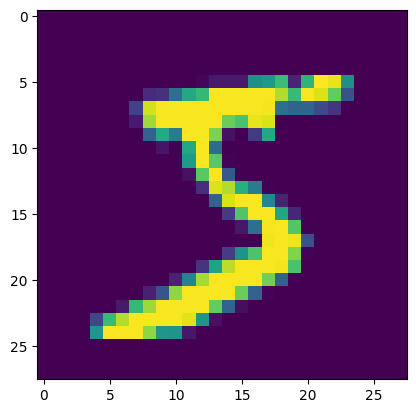

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [ ]:
X_train = X_train/255
X_test=X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#building ANN

model = Sequential()

#flatten layer
model.add(Flatten(input_shape=(28,28)))

#building model
#first layer
model.add(Dense(128, activation='relu'))

#second layer
model.add(Dense(32, activation='relu'))

#output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2904 - accuracy: 0.9153 - val_loss: 0.1426 - val_accuracy: 0.9593
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1214 - accuracy: 0.9642 - val_loss: 0.1394 - val_accuracy: 0.9600
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0829 - accuracy: 0.9741 - val_loss: 0.1127 - val_accuracy: 0.9681
Epoch 4/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0633 - accuracy: 0.9799 - val_loss: 0.0956 - val_accuracy: 0.9742
Epoch 5/25
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.0946 - val_accuracy: 0.9713
Epoch 6/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0400 - accuracy: 0.9868 - val_loss: 0.1027 - val_accuracy: 0.9723
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.0959 - val_accur

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9745

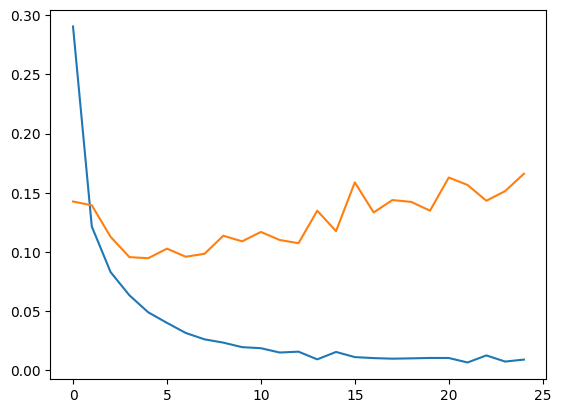

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

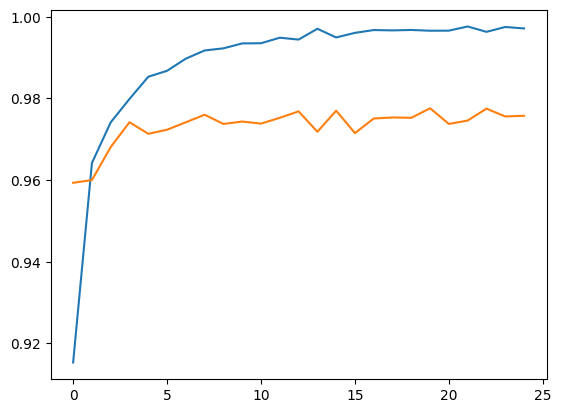

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

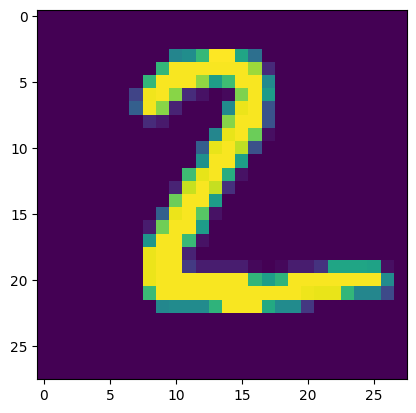

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 26ms/step


array([2])